In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("final_cleaned_data.csv")
df

,Biomass,Type,Moisture content (% wb),"Initial avg. particle size, (mm)",In-feed Seive Size (mm),Volatile Matter (%),Ash (%),Energy content (MJ/kg),Grinder type,"Motor size, kW","Screen size, mm",Grinding Rate (Mg/h),Feed rate (g/s),"Sp. Grinding energy, kJ/kg",Final particle size (mm)
0,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Hammer mill,14.9,6.35,NaN,7.1,95.0,1.49
1,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Hammer mill,14.9,3.18,NaN,3.9,141.0,1.02
2,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Hammer mill,14.9,0.79,NaN,2.3,328.0,0.65
3,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Knife mill,3.7,6.35,NaN,3.0,153.0,2.66
4,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Knife mill,3.7,4.76,NaN,2.3,205.0,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,2310.0,NaN
311,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,1680.0,NaN
312,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,1440.0,NaN
313,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,1260.0,NaN


In [41]:
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
df

,Biomass,Type,Moisture content (% wb),"Initial avg. particle size, (mm)",In-feed Seive Size (mm),Volatile Matter (%),Ash (%),Energy content (MJ/kg),Grinder type,"Motor size, kW","Screen size, mm",Grinding Rate (Mg/h),Feed rate (g/s),"Sp. Grinding energy, kJ/kg",Final particle size (mm)
0,WOODY BIOMASS,DOUGLAS FIR CHIPS,13.0,10.36,NaN,NaN,NaN,NaN,HAMMER MILL,14.9,6.35,NaN,7.1,95.0,1.49
1,WOODY BIOMASS,DOUGLAS FIR CHIPS,13.0,10.36,NaN,NaN,NaN,NaN,HAMMER MILL,14.9,3.18,NaN,3.9,141.0,1.02
2,WOODY BIOMASS,DOUGLAS FIR CHIPS,13.0,10.36,NaN,NaN,NaN,NaN,HAMMER MILL,14.9,0.79,NaN,2.3,328.0,0.65
3,WOODY BIOMASS,DOUGLAS FIR CHIPS,13.0,10.36,NaN,NaN,NaN,NaN,KNIFE MILL,3.7,6.35,NaN,3.0,153.0,2.66
4,WOODY BIOMASS,DOUGLAS FIR CHIPS,13.0,10.36,NaN,NaN,NaN,NaN,KNIFE MILL,3.7,4.76,NaN,2.3,205.0,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,AGRICULTURAL RESIDUE,CORN STALK,14.0,40.00,NaN,NaN,NaN,NaN,LAB MILL,0.9,NaN,NaN,NaN,2310.0,NaN
311,AGRICULTURAL RESIDUE,CORN STALK,14.0,40.00,NaN,NaN,NaN,NaN,LAB MILL,0.9,NaN,NaN,NaN,1680.0,NaN
312,AGRICULTURAL RESIDUE,CORN STALK,14.0,40.00,NaN,NaN,NaN,NaN,LAB MILL,0.9,NaN,NaN,NaN,1440.0,NaN
313,AGRICULTURAL RESIDUE,CORN STALK,14.0,40.00,NaN,NaN,NaN,NaN,LAB MILL,0.9,NaN,NaN,NaN,1260.0,NaN


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select relevant features ---
features = [
    "Moisture content (% wb)",
    "Initial avg. particle size, (mm)",
    "Screen size, mm",
    "Feed rate (g/s)",
    "Sp. Grinding energy, kJ/kg",
    "Grinder type"
]

target = "Final particle size (mm)"

# --- Step 2: Clean data ---
rf_df = df.dropna(subset=features + [target]).copy()

# Standardize text features
rf_df["Grinder type"] = rf_df["Grinder type"].str.strip().str.title()

# Convert categorical grinder type into numeric form
rf_df = pd.get_dummies(rf_df, columns=["Grinder type","Biomass"], drop_first=True)


# --- Step 3: Split data ---
X = rf_df.drop(columns=[target])
y = rf_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train Random Forest ---
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=3
)
rf.fit(X_train, y_train)

# --- Step 5: Evaluate performance ---
y_pred = rf.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")

# --- Step 6: Feature importance visualization ---
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'ALFALFA'

In [ ]:
df.dtypes

Biomass                              object
Type                                 object
Moisture content (% wb)             float64
Initial avg. particle size, (mm)    float64
In-feed Seive Size (mm)              object
Volatile Matter (%)                 float64
Ash (%)                             float64
Energy content (MJ/kg)              float64
Grinder type                         object
Motor size, kW                      float64
Screen size, mm                     float64
Grinding Rate (Mg/h)                float64
Feed rate (g/s)                     float64
Sp. Grinding energy, kJ/kg          float64
Final particle size (mm)            float64
dtype: object

In [ ]:
df.isnull().sum()

Biomass                               0
Type                                  0
Moisture content (% wb)               0
Initial avg. particle size, (mm)    125
In-feed Seive Size (mm)             269
Volatile Matter (%)                 307
Ash (%)                             284
Energy content (MJ/kg)              284
Grinder type                          0
Motor size, kW                       10
Screen size, mm                      34
Grinding Rate (Mg/h)                291
Feed rate (g/s)                     215
Sp. Grinding energy, kJ/kg           11
Final particle size (mm)            102
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    "Moisture content (% wb)",
    "Initial avg. particle size, (mm)",
    "Screen size, mm",
    "Feed rate (g/s)",
    "Sp. Grinding energy, kJ/kg",
    "Grinder type",
    "Biomass",
    "Motor size, kW"
]

target = "Final particle size (mm)"

#rf_df = df.dropna(subset=features + [target]).copy()
rf_df = df[features + [target]].copy()
#rf_df.drop(columns=['Ash (%)','Volatile Matter (%)','Type','Energy content (MJ/kg)','Grinding Rate (Mg/h)','In-feed Seive Size (mm)'], inplace=True)
rf_df["Grinder type"] = rf_df["Grinder type"].str.strip().str.title()
rf_df["Biomass"] = rf_df["Biomass"].str.strip().str.title()
#rf_df = pd.get_dummies(rf_df, columns=["Grinder type","Biomass"], drop_first=True)


,Moisture content (% wb),"Initial avg. particle size, (mm)","Screen size, mm",Feed rate (g/s),"Sp. Grinding energy, kJ/kg",Grinder type,Biomass,"Motor size, kW",Final particle size (mm)
0,13.0,10.36,6.35,7.1,95.0,Hammer Mill,Woody Biomass,14.9,1.49
1,13.0,10.36,3.18,3.9,141.0,Hammer Mill,Woody Biomass,14.9,1.02
2,13.0,10.36,0.79,2.3,328.0,Hammer Mill,Woody Biomass,14.9,0.65
3,13.0,10.36,6.35,3.0,153.0,Knife Mill,Woody Biomass,3.7,2.66
4,13.0,10.36,4.76,2.3,205.0,Knife Mill,Woody Biomass,3.7,1.94
...,...,...,...,...,...,...,...,...,...
310,14.0,40.00,NaN,NaN,2310.0,Lab Mill,Agricultural Residue,0.9,NaN
311,14.0,40.00,NaN,NaN,1680.0,Lab Mill,Agricultural Residue,0.9,NaN
312,14.0,40.00,NaN,NaN,1440.0,Lab Mill,Agricultural Residue,0.9,NaN
313,14.0,40.00,NaN,NaN,1260.0,Lab Mill,Agricultural Residue,0.9,NaN


In [ ]:
rf_df['Biomass'].value_counts()
rf_df['Grinder type'].value_counts()

Grinder type
Hammer Mill                197
Knife Mill                  63
Who (Tub) Grinder           20
Lab Mill                    15
Chopper                      8
Rotor Impact Mill            7
Medallion (Tub) Grinder      4
Ring Roller Mill             1
Name: count, dtype: int64

In [ ]:
rf_df = pd.get_dummies(rf_df, columns=["Grinder type","Biomass"], drop_first=True)
rf_df

,Moisture content (% wb),"Initial avg. particle size, (mm)","Screen size, mm",Feed rate (g/s),"Sp. Grinding energy, kJ/kg","Motor size, kW",Final particle size (mm),Grinder type_Hammer Mill,Grinder type_Knife Mill,Grinder type_Lab Mill,Grinder type_Medallion (Tub) Grinder,Grinder type_Ring Roller Mill,Grinder type_Rotor Impact Mill,Grinder type_Who (Tub) Grinder,Biomass_Energy Crops,Biomass_Woody Biomass
0,13.0,10.36,6.35,7.1,95.0,14.9,1.49,True,False,False,False,False,False,False,False,True
1,13.0,10.36,3.18,3.9,141.0,14.9,1.02,True,False,False,False,False,False,False,False,True
2,13.0,10.36,0.79,2.3,328.0,14.9,0.65,True,False,False,False,False,False,False,False,True
3,13.0,10.36,6.35,3.0,153.0,3.7,2.66,False,True,False,False,False,False,False,False,True
4,13.0,10.36,4.76,2.3,205.0,3.7,1.94,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,14.0,40.00,NaN,NaN,2310.0,0.9,NaN,False,False,True,False,False,False,False,False,False
311,14.0,40.00,NaN,NaN,1680.0,0.9,NaN,False,False,True,False,False,False,False,False,False
312,14.0,40.00,NaN,NaN,1440.0,0.9,NaN,False,False,True,False,False,False,False,False,False
313,14.0,40.00,NaN,NaN,1260.0,0.9,NaN,False,False,True,False,False,False,False,False,False


In [ ]:
X = rf_df.drop(columns=[target])
y = rf_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Moisture content (% wb),"Initial avg. particle size, (mm)","Screen size, mm",Feed rate (g/s),"Sp. Grinding energy, kJ/kg","Motor size, kW",Grinder type_Hammer Mill,Grinder type_Knife Mill,Grinder type_Lab Mill,Grinder type_Medallion (Tub) Grinder,Grinder type_Ring Roller Mill,Grinder type_Rotor Impact Mill,Grinder type_Who (Tub) Grinder,Biomass_Energy Crops,Biomass_Woody Biomass
0,13.0,10.36,6.35,7.1,95.0,14.9,True,False,False,False,False,False,False,False,True
1,13.0,10.36,3.18,3.9,141.0,14.9,True,False,False,False,False,False,False,False,True
2,13.0,10.36,0.79,2.3,328.0,14.9,True,False,False,False,False,False,False,False,True
3,13.0,10.36,6.35,3.0,153.0,3.7,False,True,False,False,False,False,False,False,True
4,13.0,10.36,4.76,2.3,205.0,3.7,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,14.0,40.00,NaN,NaN,2310.0,0.9,False,False,True,False,False,False,False,False,False
311,14.0,40.00,NaN,NaN,1680.0,0.9,False,False,True,False,False,False,False,False,False
312,14.0,40.00,NaN,NaN,1440.0,0.9,False,False,True,False,False,False,False,False,False
313,14.0,40.00,NaN,NaN,1260.0,0.9,False,False,True,False,False,False,False,False,False


In [ ]:
y

0      1.49
1      1.02
2      0.65
3      2.66
4      1.94
       ... 
310     NaN
311     NaN
312     NaN
313     NaN
314     NaN
Name: Final particle size (mm), Length: 315, dtype: float64

This cell onwards is for ideal, no NaNs and Implementation


Make this clean and noting values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    "Moisture content (% wb)",
    "Initial avg. particle size, (mm)",
    "Screen size, mm",
    "Feed rate (g/s)",
    "Sp. Grinding energy, kJ/kg",
    "Grinder type",
    "Biomass",
    "Motor size, kW"
]

target = "Final particle size (mm)"

rf_df = df.dropna(subset=features + [target]).copy()
#rf_df = df[features + [target]].copy()
rf_df.drop(columns=['Ash (%)','Volatile Matter (%)','Type','Energy content (MJ/kg)','Grinding Rate (Mg/h)','In-feed Seive Size (mm)'], inplace=True)
rf_df["Grinder type"] = rf_df["Grinder type"].str.strip().str.title()
rf_df["Biomass"] = rf_df["Biomass"].str.strip().str.title()
rf_df = pd.get_dummies(rf_df, columns=["Grinder type","Biomass"], drop_first=True)
rf_df

,Moisture content (% wb),"Initial avg. particle size, (mm)","Motor size, kW","Screen size, mm",Feed rate (g/s),"Sp. Grinding energy, kJ/kg",Final particle size (mm),Grinder type_Knife Mill,Biomass_Energy Crops,Biomass_Woody Biomass
0,13.0,10.36,14.9000,6.35,7.10,95.00,1.49,False,False,True
1,13.0,10.36,14.9000,3.18,3.90,141.00,1.02,False,False,True
2,13.0,10.36,14.9000,0.79,2.30,328.00,0.65,False,False,True
3,13.0,10.36,3.7000,6.35,3.00,153.00,2.66,True,False,True
4,13.0,10.36,3.7000,4.76,2.30,205.00,1.94,True,False,True
5,13.0,10.36,3.7000,3.18,1.10,345.00,1.54,True,False,True
16,11.7,9.71,2.2000,25.40,5.00,5.04,3.59,False,False,True
17,11.7,9.71,2.2000,12.70,5.00,22.68,2.18,False,False,True
18,11.7,9.71,2.2000,10.00,5.00,30.60,1.83,False,False,True
19,11.7,9.71,2.2000,6.30,5.00,56.52,1.12,False,False,True


In [ ]:
rf_df["Grinder type"].value_counts()

Grinder type
Hammer Mill    57
Knife Mill      3
Name: count, dtype: int64

In [ ]:
rf_df["Biomass"].value_counts()

Biomass
Agricultural Residue    27
Energy Crops            22
Woody Biomass           11
Name: count, dtype: int64

In [ ]:
X = rf_df.drop(columns=[target])
y = rf_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R² Score: 0.875
MAE: 0.082


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_69176/3910807787.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


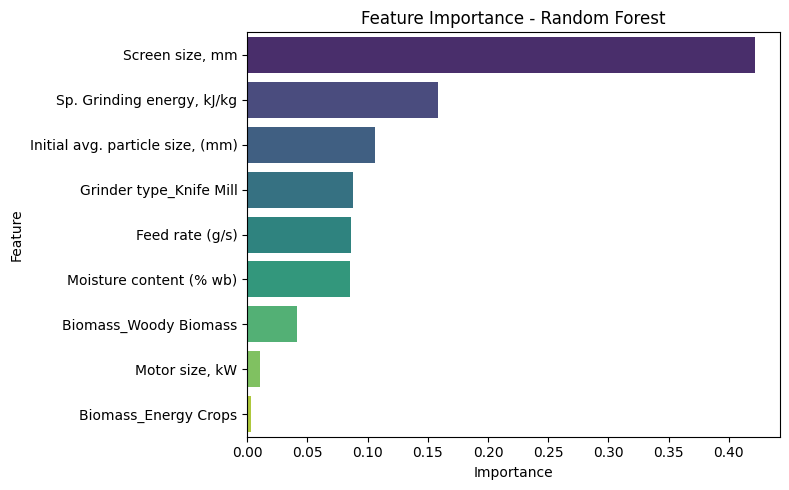

In [ ]:
# --- Step 4: Train Random Forest ---
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=3
)
rf.fit(X_train, y_train)

# --- Step 5: Evaluate performance ---
y_pred = rf.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")

# --- Step 6: Feature importance visualization ---
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

R² Score: 0.867
MAE: 0.085


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_69176/864389858.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="mako")


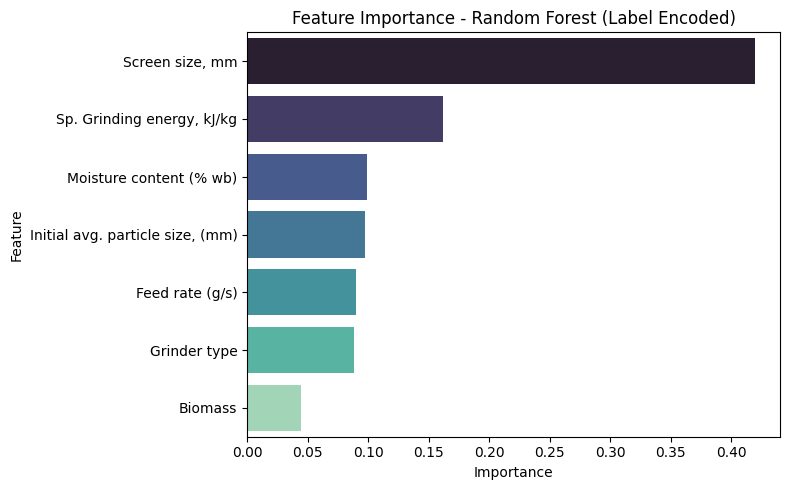

In [ ]:
from sklearn.preprocessing import LabelEncoder

# --- Data Cleaning ---
rf_df = df.dropna(subset=[
    "Moisture content (% wb)",
    "Initial avg. particle size, (mm)",
    "Screen size, mm",
    "Feed rate (g/s)",
    "Sp. Grinding energy, kJ/kg",
    "Grinder type",
    "Biomass",
    "Final particle size (mm)"
]).copy()

# Standardize text
rf_df["Grinder type"] = rf_df["Grinder type"].str.strip().str.title()
rf_df["Biomass"] = rf_df["Biomass"].str.strip().str.title()

# Label encode categorical columns
le_grinder = LabelEncoder()
le_biomass = LabelEncoder()

rf_df["Grinder type"] = le_grinder.fit_transform(rf_df["Grinder type"])
rf_df["Biomass"] = le_biomass.fit_transform(rf_df["Biomass"])

# --- Split Data ---
X = rf_df[[
    "Moisture content (% wb)",
    "Initial avg. particle size, (mm)",
    "Screen size, mm",
    "Feed rate (g/s)",
    "Sp. Grinding energy, kJ/kg",
    "Grinder type",
    "Biomass"
]]
y = rf_df["Final particle size (mm)"]

# --- Train/Test Split ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest Model ---
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# --- Evaluate ---
y_pred = rf.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")

# --- Feature Importance ---
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="mako")
plt.title("Feature Importance - Random Forest (Label Encoded)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_69176/1559748640.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = encoder.fit_transform(X[categorical_cols])
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_69176/1559748640.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")


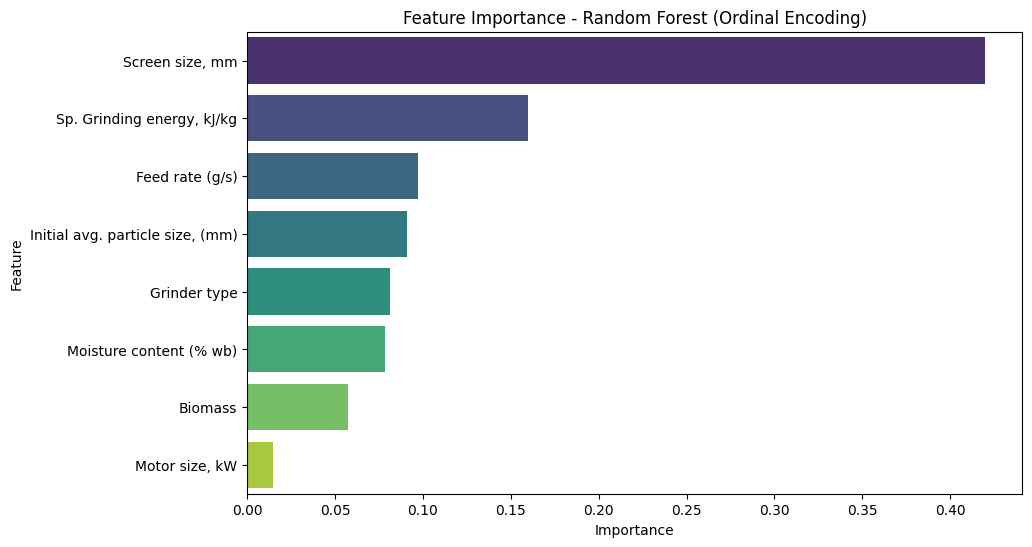

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target
features = [
    "Screen size, mm",
    "Sp. Grinding energy, kJ/kg",
    "Initial avg. particle size, (mm)",
    "Grinder type",
    "Feed rate (g/s)",
    "Moisture content (% wb)",
    "Biomass",
    "Motor size, kW"
]
target = "Final particle size (mm)"

# Drop missing values for simplicity
df_clean = df[features + [target]].dropna()

# Separate features and target
X = df_clean[features]
y = df_clean[target]

# Apply Ordinal Encoding to categorical columns
categorical_cols = ["Grinder type", "Biomass"]
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feat_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance, palette="viridis")
plt.title("Feature Importance - Random Forest (Ordinal Encoding)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


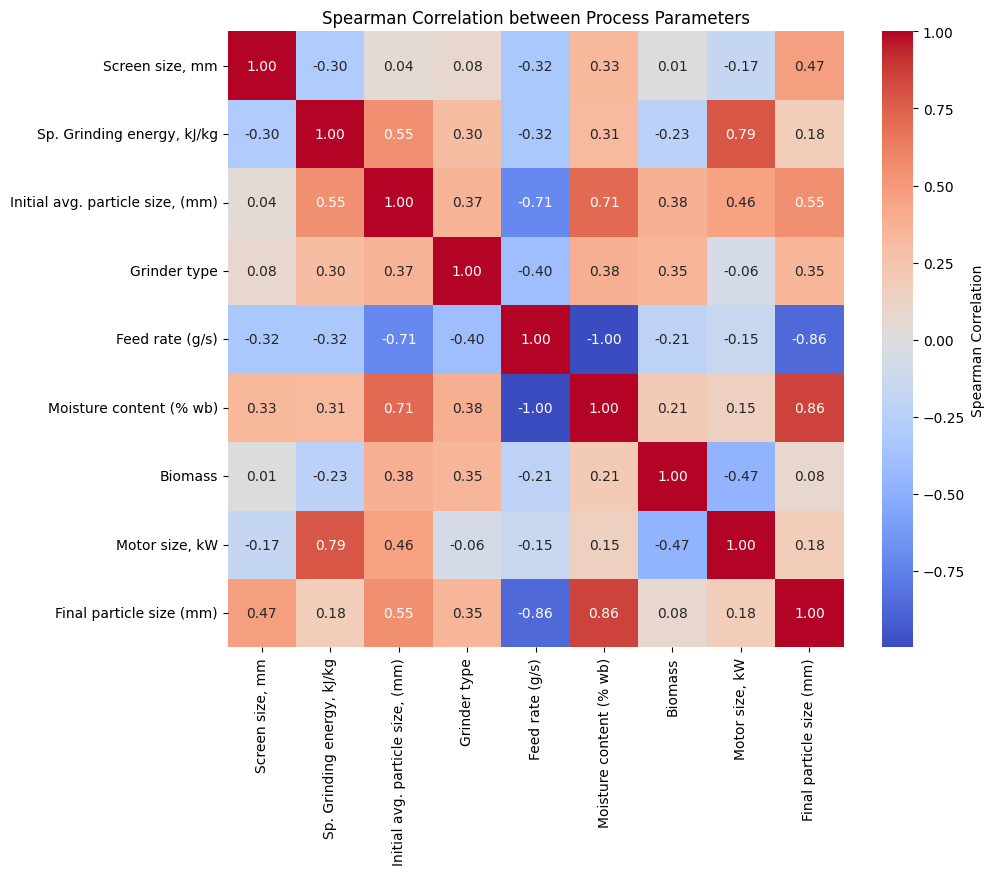

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Select relevant columns
features = [
    "Screen size, mm",
    "Sp. Grinding energy, kJ/kg",
    "Initial avg. particle size, (mm)",
    "Grinder type",
    "Feed rate (g/s)",
    "Moisture content (% wb)",
    "Biomass",
    "Motor size, kW",
    "Final particle size (mm)"
]

# Drop missing values
df_corr = df[features].dropna().copy()

# Encode categorical columns using OrdinalEncoder
encoder = OrdinalEncoder()
categorical_cols = ["Grinder type", "Biomass"]
df_corr[categorical_cols] = encoder.fit_transform(df_corr[categorical_cols])

# Compute Spearman correlation
corr = df_corr.corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar_kws={'label': 'Spearman Correlation'}
)
plt.title("Spearman Correlation between Process Parameters")
plt.show()


In [ ]:
df_corr

,"Screen size, mm","Sp. Grinding energy, kJ/kg","Initial avg. particle size, (mm)",Grinder type,Feed rate (g/s),Moisture content (% wb),Biomass,"Motor size, kW",Final particle size (mm)
0,6.35,95.00,10.36,0.0,7.10,13.0,2.0,14.9000,1.49
1,3.18,141.00,10.36,0.0,3.90,13.0,2.0,14.9000,1.02
2,0.79,328.00,10.36,0.0,2.30,13.0,2.0,14.9000,0.65
3,6.35,153.00,10.36,1.0,3.00,13.0,2.0,3.7000,2.66
4,4.76,205.00,10.36,1.0,2.30,13.0,2.0,3.7000,1.94
5,3.18,345.00,10.36,1.0,1.10,13.0,2.0,3.7000,1.54
16,25.40,5.04,9.71,0.0,5.00,11.7,2.0,2.2000,3.59
17,12.70,22.68,9.71,0.0,5.00,11.7,2.0,2.2000,2.18
18,10.00,30.60,9.71,0.0,5.00,11.7,2.0,2.2000,1.83
19,6.30,56.52,9.71,0.0,5.00,11.7,2.0,2.2000,1.12


# Comprehensive Machine Learning Analysis for Biomass Grinding Prediction

## Overview
This analysis implements and optimizes three ML models (Random Forest, ANN, XGBoost) to predict:
1. **Final Particle Size (mm)** (primary target)
2. **Specific Grinding Energy (kJ/kg)** (secondary target)

Using only the parameters from the plotting graphs:
- Moisture content (% wb)
- Initial avg. particle size (mm)
- Feed rate (g/s)
- Motor size (kW)
- Screen size (mm)
- Grinder type (categorical)
- Biomass (categorical)

We will use hyperparameter tuning and SHAP analysis for model interpretability.


## Step 1: Data Preparation and Exploratory Analysis


In [43]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [44]:
# Load and prepare data
df_ml = pd.read_csv("final_cleaned_data.csv")

# Capitalize string values
df_ml = df_ml.map(lambda x: x.upper() if isinstance(x, str) else x)

# Define features (only those used in plotting graphs)
features = [
    "Moisture content (% wb)",
    "Initial avg. particle size, (mm)",
    "Feed rate (g/s)",
    "Motor size, kW",
    "Screen size, mm",
    "Grinder type",
    "Biomass"
]

# Define targets
target1 = "Final particle size (mm)"  # Primary target
target2 = "Sp. Grinding energy, kJ/kg"  # Secondary target

# Clean data: drop rows with missing values in features and targets
df_ml_clean = df_ml[features + [target1, target2]].dropna().copy()

print(f"Original dataset shape: {df_ml.shape}")
print(f"Cleaned dataset shape: {df_ml_clean.shape}")
print(f"\nMissing values after cleaning:\n{df_ml_clean.isnull().sum()}")
df_ml_clean.head()


Original dataset shape: (315, 15)
Cleaned dataset shape: (60, 9)

Missing values after cleaning:
Moisture content (% wb)             0
Initial avg. particle size, (mm)    0
Feed rate (g/s)                     0
Motor size, kW                      0
Screen size, mm                     0
Grinder type                        0
Biomass                             0
Final particle size (mm)            0
Sp. Grinding energy, kJ/kg          0
dtype: int64


,Moisture content (% wb),"Initial avg. particle size, (mm)",Feed rate (g/s),"Motor size, kW","Screen size, mm",Grinder type,Biomass,Final particle size (mm),"Sp. Grinding energy, kJ/kg"
0,13.0,10.36,7.1,14.9,6.35,HAMMER MILL,WOODY BIOMASS,1.49,95.0
1,13.0,10.36,3.9,14.9,3.18,HAMMER MILL,WOODY BIOMASS,1.02,141.0
2,13.0,10.36,2.3,14.9,0.79,HAMMER MILL,WOODY BIOMASS,0.65,328.0
3,13.0,10.36,3.0,3.7,6.35,KNIFE MILL,WOODY BIOMASS,2.66,153.0
4,13.0,10.36,2.3,3.7,4.76,KNIFE MILL,WOODY BIOMASS,1.94,205.0


In [45]:
# Standardize text in categorical columns
df_ml_clean["Grinder type"] = df_ml_clean["Grinder type"].str.strip().str.title()
df_ml_clean["Biomass"] = df_ml_clean["Biomass"].str.strip().str.title()

print("Grinder types:", df_ml_clean["Grinder type"].unique())
print("Biomass types:", df_ml_clean["Biomass"].unique())
print(f"\nData shape: {df_ml_clean.shape}")


Grinder types: ['Hammer Mill' 'Knife Mill']
Biomass types: ['Woody Biomass' 'Energy Crops' 'Agricultural Residue']

Data shape: (60, 9)


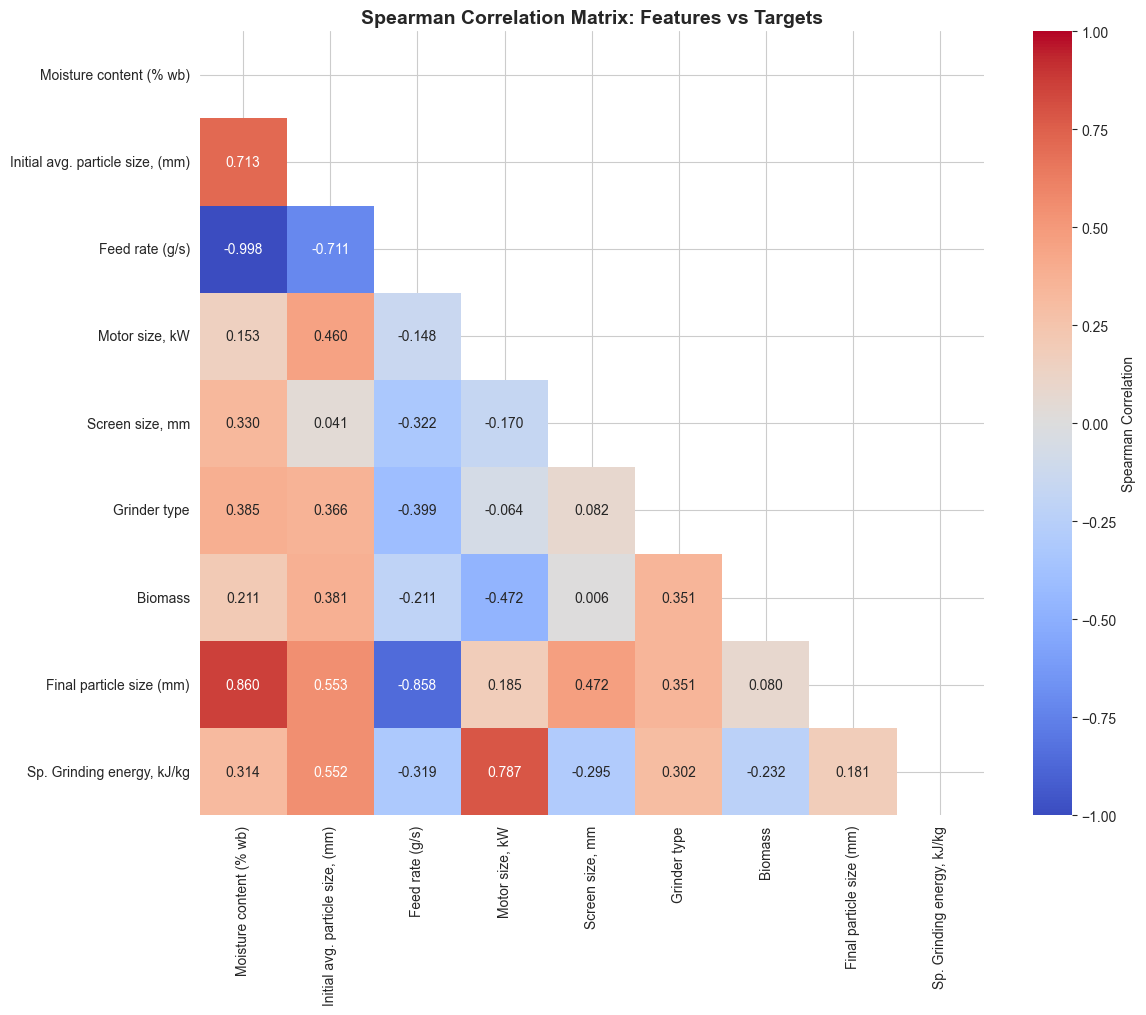

In [46]:
# Create Spearman correlation plots for all features vs targets

# Prepare data for correlation - encode categorical variables
df_corr_ml = df_ml_clean.copy()
encoder_corr = OrdinalEncoder()
df_corr_ml[["Grinder type", "Biomass"]] = encoder_corr.fit_transform(
    df_corr_ml[["Grinder type", "Biomass"]]
)

# Compute Spearman correlation
corr_matrix = df_corr_ml.corr(method='spearman')

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".3f",
    square=True,
    center=0,
    cbar_kws={'label': 'Spearman Correlation'},
    vmin=-1,
    vmax=1
)
plt.title("Spearman Correlation Matrix: Features vs Targets", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [47]:
# Separate features and targets
X = df_ml_clean[features].copy()
y1 = df_ml_clean[target1].copy()  # Final particle size
y2 = df_ml_clean[target2].copy()  # Specific grinding energy

# Encode categorical variables using OrdinalEncoder
categorical_cols = ["Grinder type", "Biomass"]
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Split data into train/test sets (80/20 split)
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.2, random_state=42
)

# Normalize features for Random Forest and XGBoost to avoid scale bias in feature importance
scaler_rf_xgb = StandardScaler()
X_train_scaled_rf_xgb = scaler_rf_xgb.fit_transform(X_train)
X_test_scaled_rf_xgb = scaler_rf_xgb.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nFeature columns:\n{X.columns.tolist()}")
print(f"\nFeatures normalized for Random Forest and XGBoost to eliminate scale bias in feature importance")


Training set size: 48
Test set size: 12

Feature columns:
['Moisture content (% wb)', 'Initial avg. particle size, (mm)', 'Feed rate (g/s)', 'Motor size, kW', 'Screen size, mm', 'Grinder type', 'Biomass']

Features normalized for Random Forest and XGBoost to eliminate scale bias in feature importance


## Step 2: Model 1 - Random Forest Regressor with Hyperparameter Tuning

We'll start by predicting **Final Particle Size** first, then **Specific Grinding Energy**.


In [48]:
# Random Forest - Target 1: Final Particle Size (using normalized data)

# Define parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest Regressor
rf_base = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV for faster search (searching 50 combinations)
rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Starting hyperparameter tuning for Random Forest (Final Particle Size)...")
print("Using normalized features to avoid scale bias in feature importance")
rf_search.fit(X_train_scaled_rf_xgb, y1_train)  # Use normalized data

print(f"\nBest parameters: {rf_search.best_params_}")
print(f"Best cross-validation R² score: {rf_search.best_score_:.4f}")

# Use best model
rf_best_t1 = rf_search.best_estimator_


Starting hyperparameter tuning for Random Forest (Final Particle Size)...
Using normalized features to avoid scale bias in feature importance
Fitting 5 folds for each of 50 candidates, totalling 250 fits



Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best cross-validation R² score: -0.1833


Random Forest Results - Final Particle Size:
R² Score: 0.9348
MAE: 0.0612
RMSE: 0.0804

Note: Feature importances are now unbiased by feature scale differences


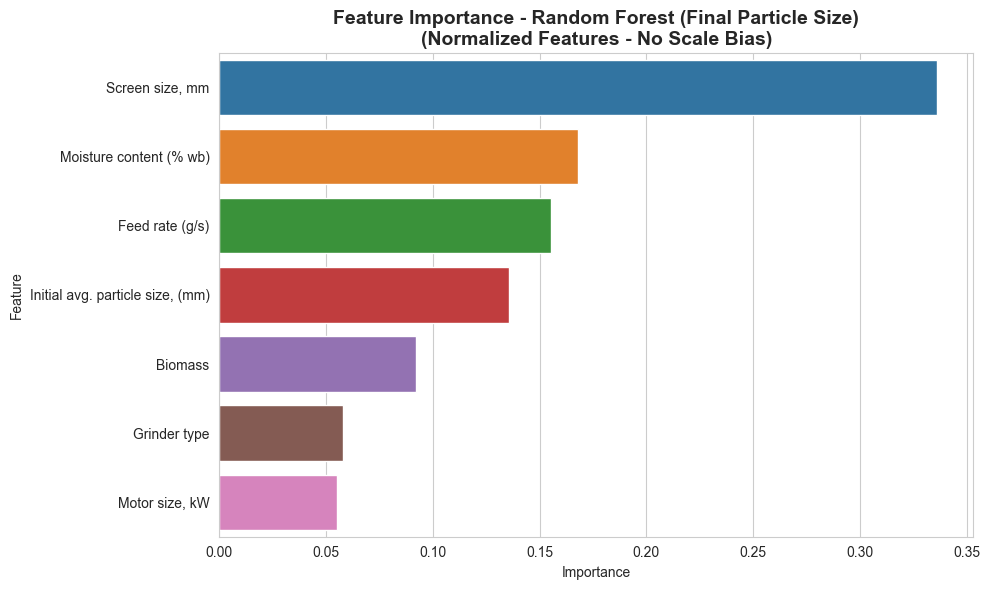

In [49]:
# Evaluate Random Forest on test set - Target 1
y1_pred_rf = rf_best_t1.predict(X_test_scaled_rf_xgb)  # Use normalized test data

rf_r2_t1 = r2_score(y1_test, y1_pred_rf)
rf_mae_t1 = mean_absolute_error(y1_test, y1_pred_rf)
rf_rmse_t1 = np.sqrt(mean_squared_error(y1_test, y1_pred_rf))

print("Random Forest Results - Final Particle Size:")
print(f"R² Score: {rf_r2_t1:.4f}")
print(f"MAE: {rf_mae_t1:.4f}")
print(f"RMSE: {rf_rmse_t1:.4f}")
print("\nNote: Feature importances are now unbiased by feature scale differences")

# Feature importance visualization
importances_rf_t1 = pd.Series(
    rf_best_t1.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf_t1.values, y=importances_rf_t1.index, hue=importances_rf_t1.index, legend=False)
plt.title("Feature Importance - Random Forest (Final Particle Size)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [50]:
# Random Forest - Target 2: Specific Grinding Energy

print("Starting hyperparameter tuning for Random Forest (Specific Grinding Energy)...")
print("Using normalized features to avoid scale bias")
rf_search_t2 = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_search_t2.fit(X_train_scaled_rf_xgb, y2_train)  # Use normalized data

print(f"\nBest parameters: {rf_search_t2.best_params_}")
print(f"Best cross-validation R² score: {rf_search_t2.best_score_:.4f}")

rf_best_t2 = rf_search_t2.best_estimator_


Starting hyperparameter tuning for Random Forest (Specific Grinding Energy)...
Using normalized features to avoid scale bias
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best cross-validation R² score: 0.7901


Random Forest Results - Specific Grinding Energy:
R² Score: 0.4325
MAE: 36.8074
RMSE: 54.4622


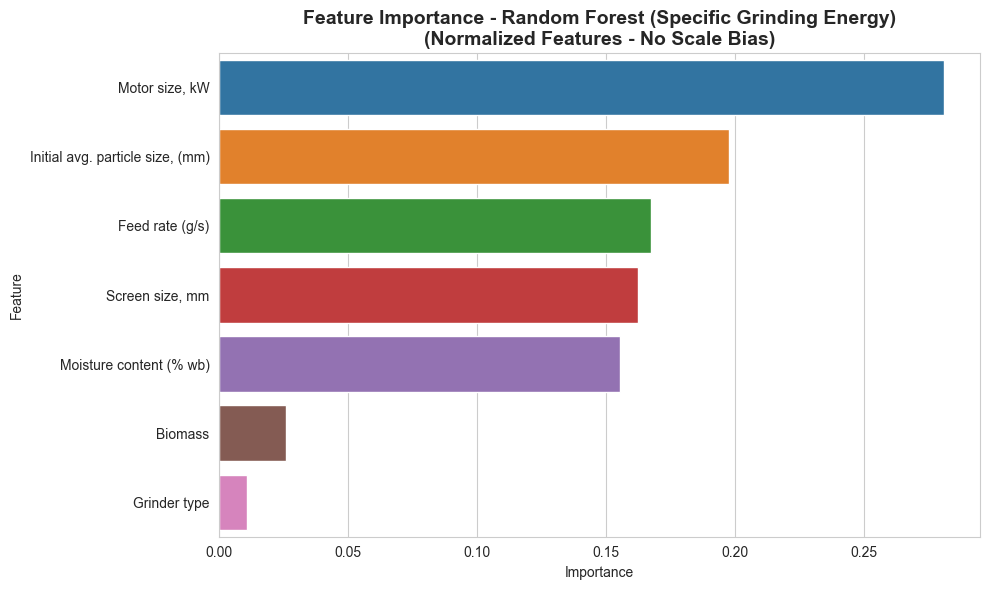

In [51]:
# Evaluate Random Forest on test set - Target 2
y2_pred_rf = rf_best_t2.predict(X_test_scaled_rf_xgb)  # Use normalized test data

rf_r2_t2 = r2_score(y2_test, y2_pred_rf)
rf_mae_t2 = mean_absolute_error(y2_test, y2_pred_rf)
rf_rmse_t2 = np.sqrt(mean_squared_error(y2_test, y2_pred_rf))

print("Random Forest Results - Specific Grinding Energy:")
print(f"R² Score: {rf_r2_t2:.4f}")
print(f"MAE: {rf_mae_t2:.4f}")
print(f"RMSE: {rf_rmse_t2:.4f}")

# Feature importance visualization
importances_rf_t2 = pd.Series(
    rf_best_t2.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf_t2.values, y=importances_rf_t2.index, hue=importances_rf_t2.index, legend=False)
plt.title("Feature Importance - Random Forest (Specific Grinding Energy)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Step 3: Model 2 - Artificial Neural Network (ANN) with Hyperparameter Tuning


In [52]:
# Import TensorFlow/Keras for ANN
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.regularizers import l2
    print(f"TensorFlow version: {tf.__version__}")
except ImportError:
    print("Installing TensorFlow...")
    import subprocess
    subprocess.check_call(["pip", "install", "tensorflow", "-q"])
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.regularizers import l2
    print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.20.0


In [53]:
# Scale features for neural network (important for convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled for ANN")
print(f"Training shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")


Features scaled for ANN
Training shape: (48, 7)
Test shape: (12, 7)


In [54]:
# ANN - Target 1: Final Particle Size
# Hyperparameter tuning using manual grid search with key parameters

def create_ann_model(hidden_layers=[64, 32], dropout_rate=0.2, learning_rate=0.001, l2_reg=0.01):
    """Create a neural network model with specified hyperparameters."""
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Hidden layers
    for units in hidden_layers:
        model.add(layers.Dense(
            units, 
            activation='relu',
            kernel_regularizer=l2(l2_reg)
        ))
        model.add(layers.Dropout(dropout_rate))
    
    # Output layer
    model.add(layers.Dense(1))
    
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Define hyperparameter search space
param_grid_ann = {
    'hidden_layers': [
        [64, 32],
        [128, 64],
        [128, 64, 32],
        [256, 128]
    ],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0001, 0.01],
    'l2_reg': [0.01, 0.001, 0.1]
}

print("Starting hyperparameter tuning for ANN (Final Particle Size)...")
print("This may take a while...")

# Manual grid search (sampling key combinations)
best_score_ann_t1 = -np.inf
best_params_ann_t1 = None
best_model_ann_t1 = None

# Sample combinations for faster search
combinations_tested = 0
max_combinations = 20  # Limit to 20 combinations for speed

for hidden_layers in param_grid_ann['hidden_layers']:
    for dropout_rate in [0.2, 0.3]:
        for learning_rate in [0.001, 0.0001]:
            for l2_reg in [0.01, 0.001]:
                if combinations_tested >= max_combinations:
                    break
                
                model = create_ann_model(
                    hidden_layers=hidden_layers,
                    dropout_rate=dropout_rate,
                    learning_rate=learning_rate,
                    l2_reg=l2_reg
                )
                
                # Early stopping callback
                early_stop = EarlyStopping(
                    monitor='val_loss',
                    patience=20,
                    restore_best_weights=True
                )
                
                # Train model
                history = model.fit(
                    X_train_scaled, y1_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=32,
                    verbose=0,
                    callbacks=[early_stop]
                )
                
                # Evaluate on validation set
                val_pred = model.predict(X_train_scaled[::5], verbose=0)  # Sample for speed
                val_r2 = r2_score(y1_train[::5], val_pred)
                
                if val_r2 > best_score_ann_t1:
                    best_score_ann_t1 = val_r2
                    best_params_ann_t1 = {
                        'hidden_layers': hidden_layers,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'l2_reg': l2_reg
                    }
                    best_model_ann_t1 = model
                
                combinations_tested += 1
                if combinations_tested >= max_combinations:
                    break

print(f"\nBest parameters: {best_params_ann_t1}")
print(f"Best validation R² score: {best_score_ann_t1:.4f}")

# Retrain best model on full training set
ann_best_t1 = create_ann_model(**best_params_ann_t1)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_t1 = ann_best_t1.fit(
    X_train_scaled, y1_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)


Starting hyperparameter tuning for ANN (Final Particle Size)...
This may take a while...

Best parameters: {'hidden_layers': [128, 64], 'dropout_rate': 0.3, 'learning_rate': 0.001, 'l2_reg': 0.01}
Best validation R² score: 0.8812


ANN Results - Final Particle Size:
R² Score: 0.5306
MAE: 0.1777
RMSE: 0.2158


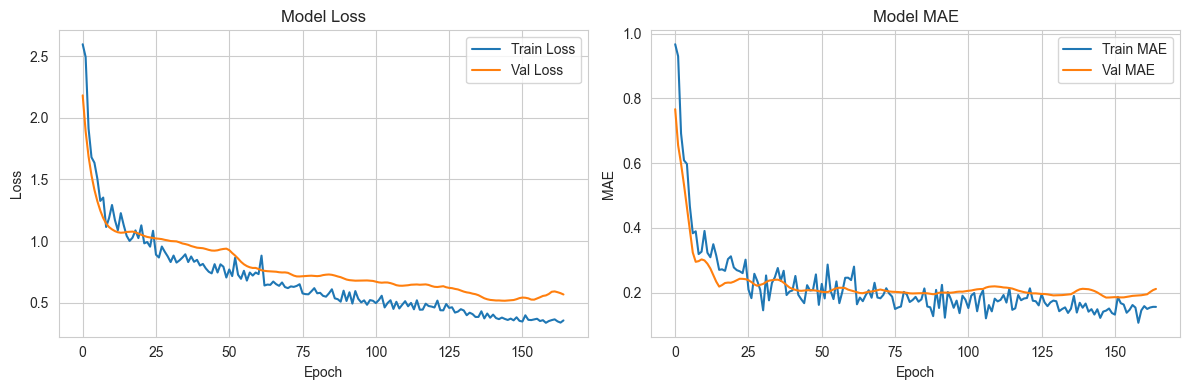

In [55]:
# Evaluate ANN on test set - Target 1
y1_pred_ann = ann_best_t1.predict(X_test_scaled, verbose=0).flatten()

ann_r2_t1 = r2_score(y1_test, y1_pred_ann)
ann_mae_t1 = mean_absolute_error(y1_test, y1_pred_ann)
ann_rmse_t1 = np.sqrt(mean_squared_error(y1_test, y1_pred_ann))

print("ANN Results - Final Particle Size:")
print(f"R² Score: {ann_r2_t1:.4f}")
print(f"MAE: {ann_mae_t1:.4f}")
print(f"RMSE: {ann_rmse_t1:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_t1.history['loss'], label='Train Loss')
plt.plot(history_t1.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_t1.history['mae'], label='Train MAE')
plt.plot(history_t1.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ANN - Target 2: Specific Grinding Energy

print("Starting hyperparameter tuning for ANN (Specific Grinding Energy)...")

best_score_ann_t2 = -np.inf
best_params_ann_t2 = None
best_model_ann_t2 = None

combinations_tested = 0
for hidden_layers in param_grid_ann['hidden_layers']:
    for dropout_rate in [0.2, 0.3]:
        for learning_rate in [0.001, 0.0001]:
            for l2_reg in [0.01, 0.001]:
                if combinations_tested >= max_combinations:
                    break
                
                model = create_ann_model(
                    hidden_layers=hidden_layers,
                    dropout_rate=dropout_rate,
                    learning_rate=learning_rate,
                    l2_reg=l2_reg
                )
                
                early_stop = EarlyStopping(
                    monitor='val_loss',
                    patience=20,
                    restore_best_weights=True
                )
                
                history = model.fit(
                    X_train_scaled, y2_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=32,
                    verbose=0,
                    callbacks=[early_stop]
                )
                
                val_pred = model.predict(X_train_scaled[::5], verbose=0)
                val_r2 = r2_score(y2_train[::5], val_pred)
                
                if val_r2 > best_score_ann_t2:
                    best_score_ann_t2 = val_r2
                    best_params_ann_t2 = {
                        'hidden_layers': hidden_layers,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'l2_reg': l2_reg
                    }
                    best_model_ann_t2 = model
                
                combinations_tested += 1
                if combinations_tested >= max_combinations:
                    break

print(f"\nBest parameters: {best_params_ann_t2}")
print(f"Best validation R² score: {best_score_ann_t2:.4f}")

# Retrain best model
ann_best_t2 = create_ann_model(**best_params_ann_t2)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_t2 = ann_best_t2.fit(
    X_train_scaled, y2_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)


Starting hyperparameter tuning for ANN (Specific Grinding Energy)...

Best parameters: {'hidden_layers': [128, 64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.001, 'l2_reg': 0.001}
Best validation R² score: 0.9543


ANN Results - Specific Grinding Energy:
R² Score: 0.4360
MAE: 34.8084
RMSE: 54.2946


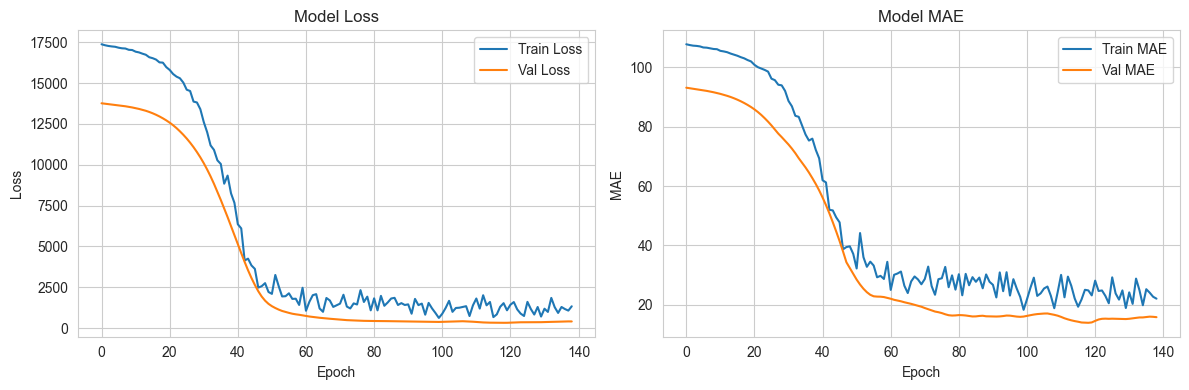

In [ ]:
# Evaluate ANN on test set - Target 2
y2_pred_ann = ann_best_t2.predict(X_test_scaled, verbose=0).flatten()

ann_r2_t2 = r2_score(y2_test, y2_pred_ann)
ann_mae_t2 = mean_absolute_error(y2_test, y2_pred_ann)
ann_rmse_t2 = np.sqrt(mean_squared_error(y2_test, y2_pred_ann))

print("ANN Results - Specific Grinding Energy:")
print(f"R² Score: {ann_r2_t2:.4f}")
print(f"MAE: {ann_mae_t2:.4f}")
print(f"RMSE: {ann_rmse_t2:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_t2.history['loss'], label='Train Loss')
plt.plot(history_t2.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_t2.history['mae'], label='Train MAE')
plt.plot(history_t2.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


## Step 4: Model 3 - XGBoost Regressor with Hyperparameter Tuning


In [56]:
# Install and import XGBoost
try:
    import xgboost as xgb
    print(f"XGBoost version: {xgb.__version__}")
except ImportError:
    print("Installing XGBoost...")
    import subprocess
    subprocess.check_call(["pip", "install", "xgboost", "-q"])
    import xgboost as xgb
    print(f"XGBoost version: {xgb.__version__}")


XGBoost version: 3.1.1


In [57]:
# XGBoost - Target 1: Final Particle Size (using normalized data)

# Define parameter grid for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create XGBoost Regressor
xgb_base = xgb.XGBRegressor(random_state=42)

# Use RandomizedSearchCV
xgb_search_t1 = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid_xgb,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Starting hyperparameter tuning for XGBoost (Final Particle Size)...")
print("Using normalized features to avoid scale bias in feature importance")
xgb_search_t1.fit(X_train_scaled_rf_xgb, y1_train)  # Use normalized data

print(f"\nBest parameters: {xgb_search_t1.best_params_}")
print(f"Best cross-validation R² score: {xgb_search_t1.best_score_:.4f}")

xgb_best_t1 = xgb_search_t1.best_estimator_


Starting hyperparameter tuning for XGBoost (Final Particle Size)...
Using normalized features to avoid scale bias in feature importance
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best cross-validation R² score: 0.1691


XGBoost Results - Final Particle Size:
R² Score: 0.4627
MAE: 0.1300
RMSE: 0.2308

Note: Feature importances are now unbiased by feature scale differences


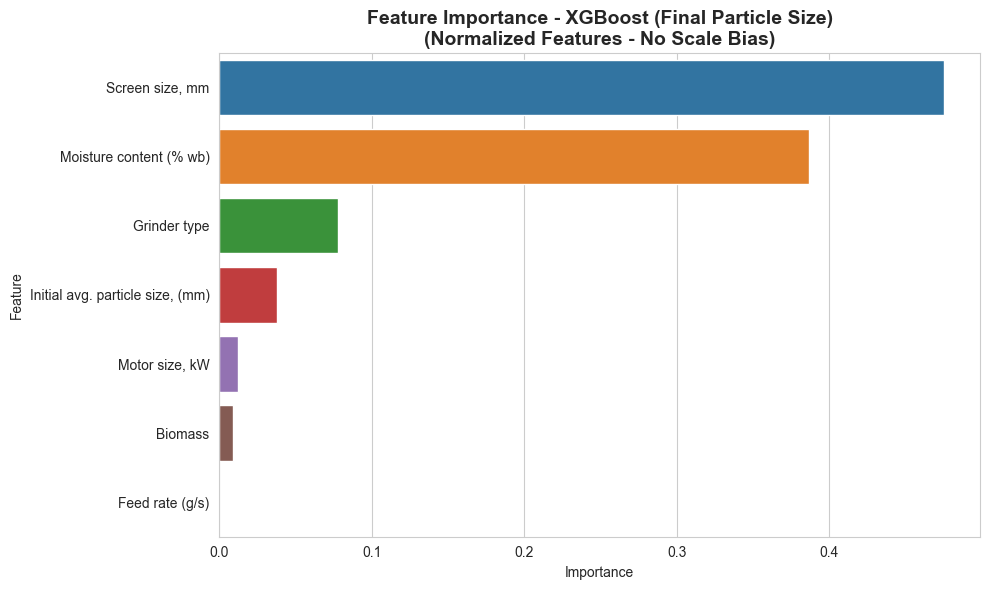

In [58]:
# Evaluate XGBoost on test set - Target 1
y1_pred_xgb = xgb_best_t1.predict(X_test_scaled_rf_xgb)  # Use normalized test data

xgb_r2_t1 = r2_score(y1_test, y1_pred_xgb)
xgb_mae_t1 = mean_absolute_error(y1_test, y1_pred_xgb)
xgb_rmse_t1 = np.sqrt(mean_squared_error(y1_test, y1_pred_xgb))

print("XGBoost Results - Final Particle Size:")
print(f"R² Score: {xgb_r2_t1:.4f}")
print(f"MAE: {xgb_mae_t1:.4f}")
print(f"RMSE: {xgb_rmse_t1:.4f}")
print("\nNote: Feature importances are now unbiased by feature scale differences")

# Feature importance visualization
importances_xgb_t1 = pd.Series(
    xgb_best_t1.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb_t1.values, y=importances_xgb_t1.index, hue=importances_xgb_t1.index, legend=False)
plt.title("Feature Importance - XGBoost (Final Particle Size)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [59]:
# XGBoost - Target 2: Specific Grinding Energy

print("Starting hyperparameter tuning for XGBoost (Specific Grinding Energy)...")
print("Using normalized features to avoid scale bias")
xgb_search_t2 = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid_xgb,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_search_t2.fit(X_train_scaled_rf_xgb, y2_train)  # Use normalized data

print(f"\nBest parameters: {xgb_search_t2.best_params_}")
print(f"Best cross-validation R² score: {xgb_search_t2.best_score_:.4f}")

xgb_best_t2 = xgb_search_t2.best_estimator_


Starting hyperparameter tuning for XGBoost (Specific Grinding Energy)...
Using normalized features to avoid scale bias
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best cross-validation R² score: 0.8606


XGBoost Results - Specific Grinding Energy:
R² Score: 0.5492
MAE: 31.5220
RMSE: 48.5383


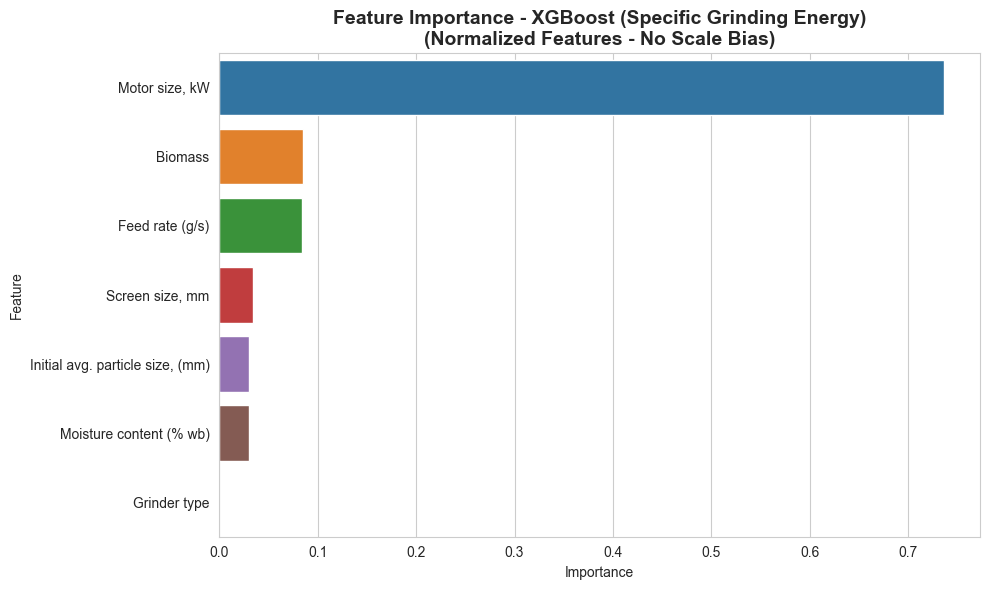

In [60]:
# Evaluate XGBoost on test set - Target 2
y2_pred_xgb = xgb_best_t2.predict(X_test_scaled_rf_xgb)  # Use normalized test data

xgb_r2_t2 = r2_score(y2_test, y2_pred_xgb)
xgb_mae_t2 = mean_absolute_error(y2_test, y2_pred_xgb)
xgb_rmse_t2 = np.sqrt(mean_squared_error(y2_test, y2_pred_xgb))

print("XGBoost Results - Specific Grinding Energy:")
print(f"R² Score: {xgb_r2_t2:.4f}")
print(f"MAE: {xgb_mae_t2:.4f}")
print(f"RMSE: {xgb_rmse_t2:.4f}")

# Feature importance visualization
importances_xgb_t2 = pd.Series(
    xgb_best_t2.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb_t2.values, y=importances_xgb_t2.index, hue=importances_xgb_t2.index, legend=False)
plt.title("Feature Importance - XGBoost (Specific Grinding Energy)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Step 5: SHAP Analysis for Model Interpretability


In [61]:
# Install and import SHAP
try:
    import shap
    print(f"SHAP version: {shap.__version__}")
except ImportError:
    print("Installing SHAP...")
    import subprocess
    subprocess.check_call(["pip", "install", "shap", "-q"])
    import shap
    print(f"SHAP version: {shap.__version__}")

# Initialize JS visualization (for interactive plots)
shap.initjs()


SHAP version: 0.49.1


Computing SHAP values for Random Forest (Final Particle Size)...
Using normalized features for SHAP analysis


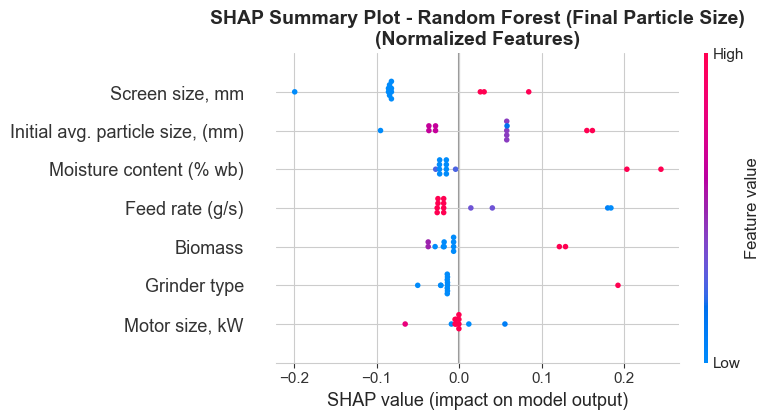

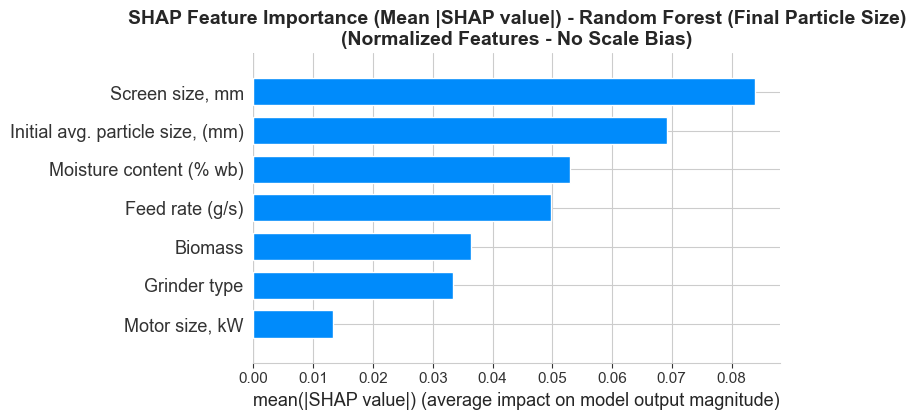

In [62]:
# SHAP Analysis for Random Forest - Target 1: Final Particle Size

print("Computing SHAP values for Random Forest (Final Particle Size)...")
print("Using normalized features for SHAP analysis")

# Use TreeExplainer for Random Forest (much faster)
explainer_rf_t1 = shap.TreeExplainer(rf_best_t1)
shap_values_rf_t1 = explainer_rf_t1.shap_values(X_test_scaled_rf_xgb)  # Use normalized test data

# Summary plot (using normalized data)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_rf_t1, X_test_scaled_rf_xgb, feature_names=X.columns, show=False)
plt.title("SHAP Summary Plot - Random Forest (Final Particle Size)\n(Normalized Features)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Bar plot for mean absolute SHAP values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf_t1, X_test_scaled_rf_xgb, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|) - Random Forest (Final Particle Size)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Computing SHAP values for Random Forest (Specific Grinding Energy)...


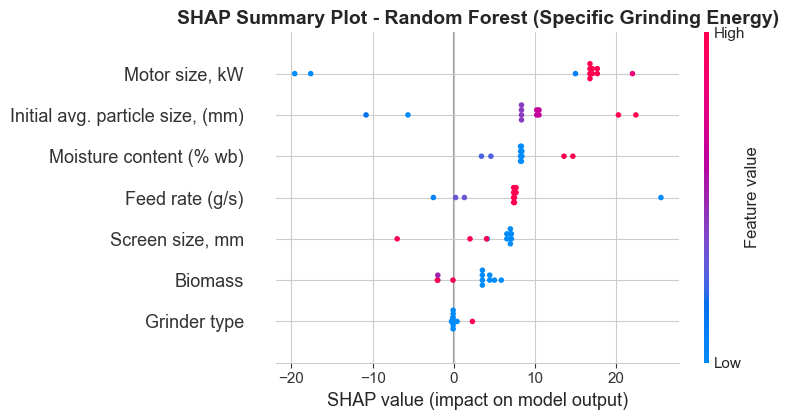

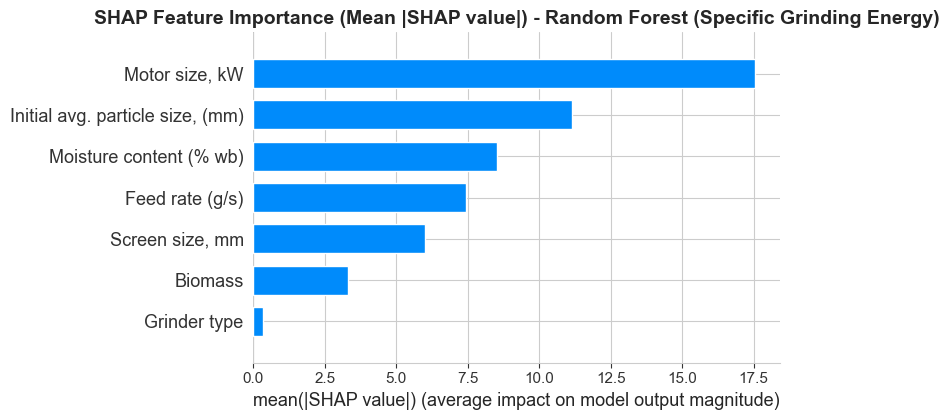

In [ ]:
# SHAP Analysis for Random Forest - Target 2: Specific Grinding Energy

print("Computing SHAP values for Random Forest (Specific Grinding Energy)...")
print("Using normalized features for SHAP analysis")

explainer_rf_t2 = shap.TreeExplainer(rf_best_t2)
shap_values_rf_t2 = explainer_rf_t2.shap_values(X_test_scaled_rf_xgb)  # Use normalized test data

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_rf_t2, X_test_scaled_rf_xgb, feature_names=X.columns, show=False)
plt.title("SHAP Summary Plot - Random Forest (Specific Grinding Energy)\n(Normalized Features)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf_t2, X_test_scaled_rf_xgb, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|) - Random Forest (Specific Grinding Energy)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Computing SHAP values for XGBoost (Final Particle Size)...
Using normalized features for SHAP analysis
Explainer failed: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)
Falling back to KernelExplainer...


  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 136.19it/s]


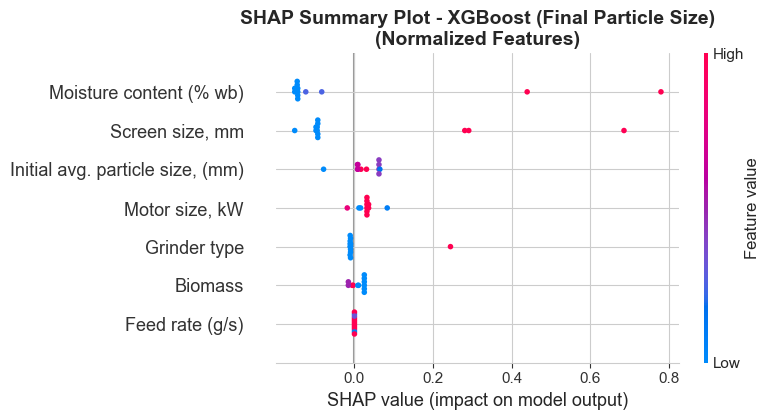

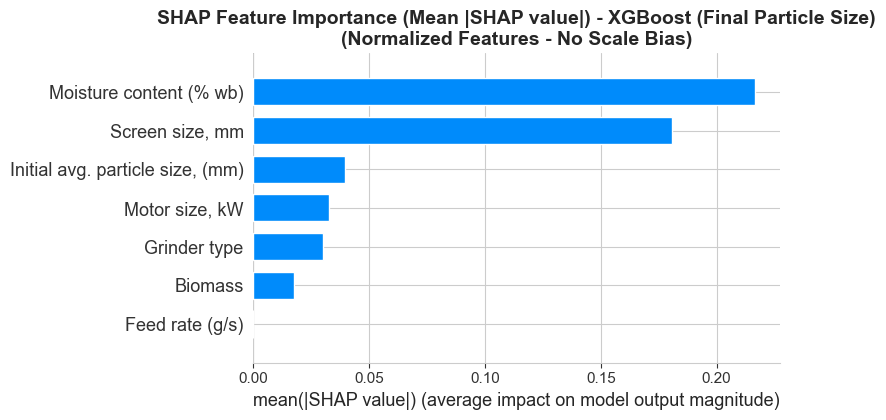

In [63]:
# SHAP Analysis for XGBoost - Target 1: Final Particle Size

print("Computing SHAP values for XGBoost (Final Particle Size)...")
print("Using normalized features for SHAP analysis")

# Use Explainer instead of TreeExplainer for better XGBoost compatibility
try:
    # Try using the modern Explainer API (more robust)
    explainer_xgb_t1 = shap.Explainer(xgb_best_t1, X_train_scaled_rf_xgb)  # Use normalized training data
    shap_values_xgb_t1 = explainer_xgb_t1(X_test_scaled_rf_xgb)  # Use normalized test data
except Exception as e:
    print(f"Explainer failed: {e}")
    print("Falling back to KernelExplainer...")
    # Fallback to KernelExplainer if TreeExplainer/Explainer fails
    def xgb_predict_t1(X):
        return xgb_best_t1.predict(X)
    background = X_train_scaled_rf_xgb[:50]  # Use normalized background
    explainer_xgb_t1 = shap.KernelExplainer(xgb_predict_t1, background)
    shap_values_xgb_t1 = explainer_xgb_t1.shap_values(X_test_scaled_rf_xgb[:100])  # Use subset for speed

# Extract values if it's a shap.Explanation object
if hasattr(shap_values_xgb_t1, 'values'):
    shap_values_xgb_t1_values = shap_values_xgb_t1.values
else:
    shap_values_xgb_t1_values = shap_values_xgb_t1

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_xgb_t1_values, X_test_scaled_rf_xgb[:len(shap_values_xgb_t1_values)], 
                  feature_names=X.columns, show=False)
plt.title("SHAP Summary Plot - XGBoost (Final Particle Size)\n(Normalized Features)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb_t1_values, X_test_scaled_rf_xgb[:len(shap_values_xgb_t1_values)], 
                  feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|) - XGBoost (Final Particle Size)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Computing SHAP values for XGBoost (Specific Grinding Energy)...
Using normalized features for SHAP analysis
Explainer failed: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)
Falling back to KernelExplainer...


100%|██████████| 12/12 [00:00<00:00, 115.59it/s]


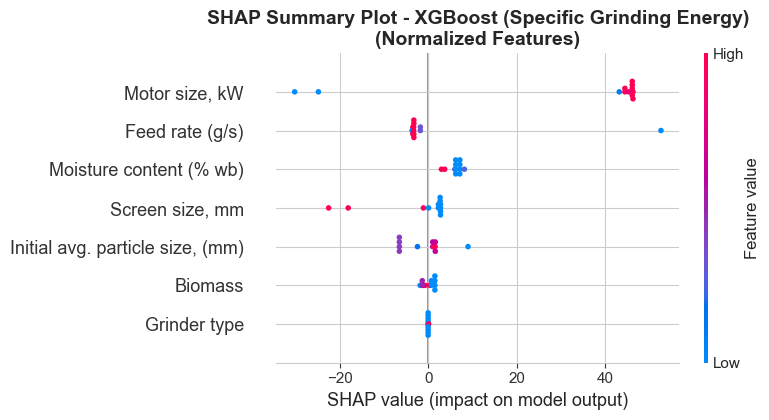

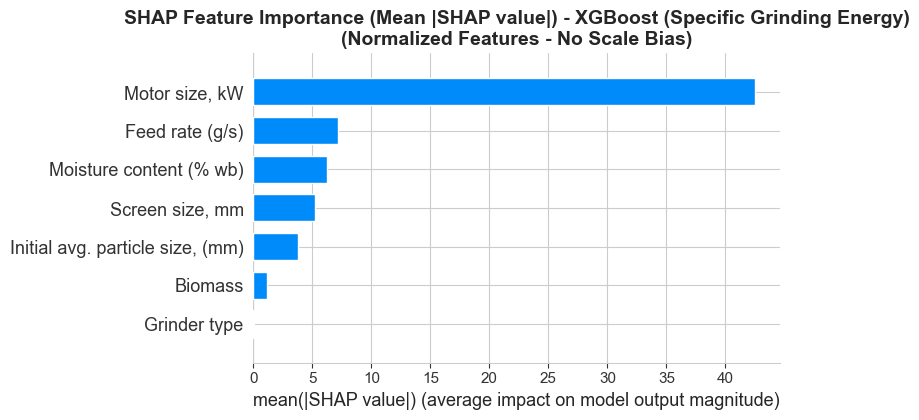

In [64]:
# SHAP Analysis for XGBoost - Target 2: Specific Grinding Energy

print("Computing SHAP values for XGBoost (Specific Grinding Energy)...")
print("Using normalized features for SHAP analysis")

# Use Explainer instead of TreeExplainer for better XGBoost compatibility
try:
    # Try using the modern Explainer API (more robust)
    explainer_xgb_t2 = shap.Explainer(xgb_best_t2, X_train_scaled_rf_xgb)  # Use normalized training data
    shap_values_xgb_t2 = explainer_xgb_t2(X_test_scaled_rf_xgb)  # Use normalized test data
except Exception as e:
    print(f"Explainer failed: {e}")
    print("Falling back to KernelExplainer...")
    # Fallback to KernelExplainer if TreeExplainer/Explainer fails
    def xgb_predict_t2(X):
        return xgb_best_t2.predict(X)
    background = X_train_scaled_rf_xgb[:50]  # Use normalized background
    explainer_xgb_t2 = shap.KernelExplainer(xgb_predict_t2, background)
    shap_values_xgb_t2 = explainer_xgb_t2.shap_values(X_test_scaled_rf_xgb[:100])  # Use subset for speed

# Extract values if it's a shap.Explanation object
if hasattr(shap_values_xgb_t2, 'values'):
    shap_values_xgb_t2_values = shap_values_xgb_t2.values
else:
    shap_values_xgb_t2_values = shap_values_xgb_t2

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_xgb_t2_values, X_test_scaled_rf_xgb[:len(shap_values_xgb_t2_values)], 
                  feature_names=X.columns, show=False)
plt.title("SHAP Summary Plot - XGBoost (Specific Grinding Energy)\n(Normalized Features)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb_t2_values, X_test_scaled_rf_xgb[:len(shap_values_xgb_t2_values)], 
                  feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|) - XGBoost (Specific Grinding Energy)\n(Normalized Features - No Scale Bias)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Computing SHAP values for ANN (Final Particle Size)...
Note: This may take longer for neural networks...


100%|██████████| 12/12 [00:01<00:00,  7.22it/s]


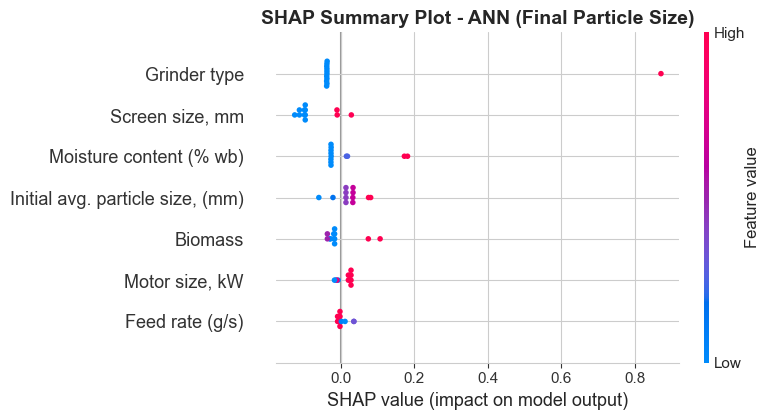

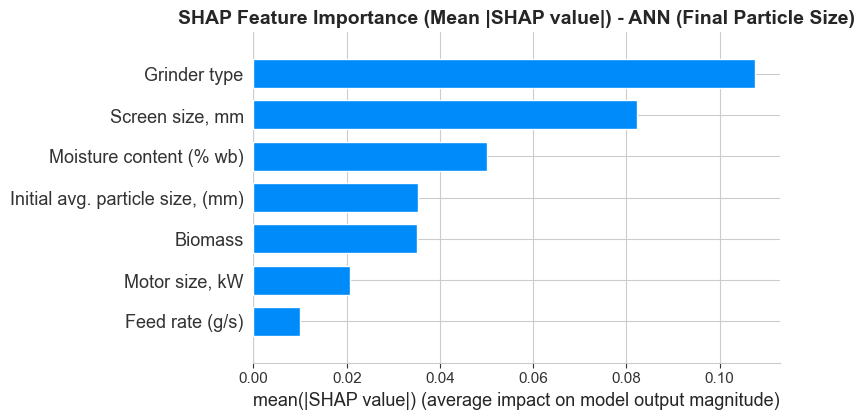

In [ ]:
# SHAP Analysis for ANN - Target 1: Final Particle Size
# Note: For neural networks, we use KernelExplainer (slower but works for any model)

print("Computing SHAP values for ANN (Final Particle Size)...")
print("Note: This may take longer for neural networks...")

# Sample a subset for SHAP (since KernelExplainer is slower)
sample_size = min(100, len(X_test))
X_test_sample = X_test_scaled[:sample_size]

# Create a wrapper function for the ANN model
def ann_predict_t1(X):
    return ann_best_t1.predict(X, verbose=0).flatten()

# Use KernelExplainer with a background dataset
background = X_train_scaled[:50]  # Use small background for speed
explainer_ann_t1 = shap.KernelExplainer(ann_predict_t1, background)
shap_values_ann_t1 = explainer_ann_t1.shap_values(X_test_sample)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_ann_t1, X_test_sample, feature_names=X.columns, show=False)
plt.title("SHAP Summary Plot - ANN (Final Particle Size)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_ann_t1, X_test_sample, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|) - ANN (Final Particle Size)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Computing SHAP values for ANN (Specific Grinding Energy)...


100%|██████████| 12/12 [00:02<00:00,  5.98it/s]


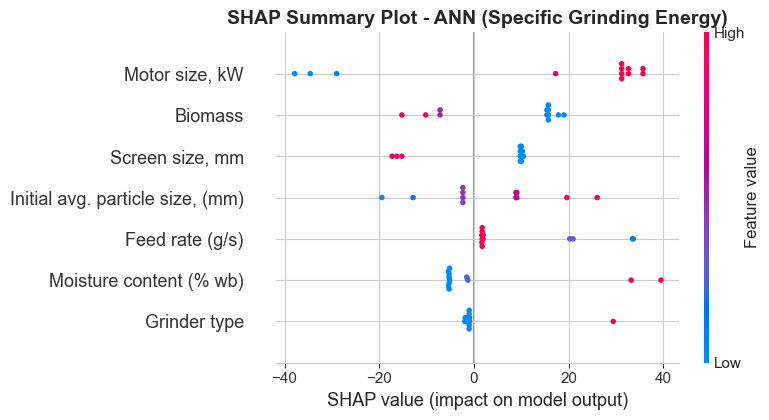

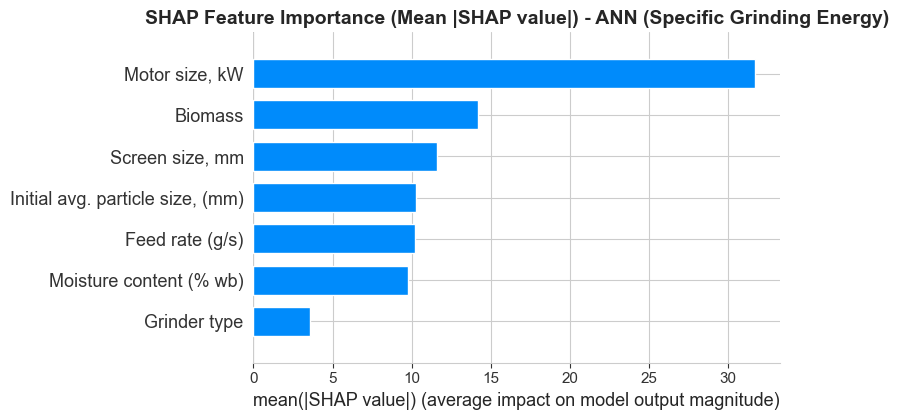

In [65]:
# SHAP Analysis for ANN - Target 2: Specific Grinding Energy

print("Computing SHAP values for ANN (Specific Grinding Energy)...")

def ann_predict_t2(X):
    return ann_best_t2.predict(X, verbose=0).flatten()

X_test_sample = X_test_scaled[:sample_size]
background = X_train_scaled[:50]
explainer_ann_t2 = shap.KernelExplainer(ann_predict_t2, background)
shap_values_ann_t2 = explainer_ann_t2.shap_values(X_test_sample)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_ann_t2, X_test_sample, feature_names=X.columns, show=False)
plt.title("SHAP Summary Plot - ANN (Specific Grinding Energy)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_ann_t2, X_test_sample, feature_names=X.columns, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP value|) - ANN (Specific Grinding Energy)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Step 6: Model Comparison and Justification


In [66]:
# Create comprehensive comparison table

comparison_data = {
    'Model': [
        'Random Forest', 'Random Forest',
        'ANN', 'ANN',
        'XGBoost', 'XGBoost'
    ],
    'Target': [
        'Final Particle Size', 'Specific Grinding Energy',
        'Final Particle Size', 'Specific Grinding Energy',
        'Final Particle Size', 'Specific Grinding Energy'
    ],
    'R² Score': [
        rf_r2_t1, rf_r2_t2,
        ann_r2_t1, ann_r2_t2,
        xgb_r2_t1, xgb_r2_t2
    ],
    'MAE': [
        rf_mae_t1, rf_mae_t2,
        ann_mae_t1, ann_mae_t2,
        xgb_mae_t1, xgb_mae_t2
    ],
    'RMSE': [
        rf_rmse_t1, rf_rmse_t2,
        ann_rmse_t1, ann_rmse_t2,
        xgb_rmse_t1, xgb_rmse_t2
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:\n")
print(comparison_df.to_string(index=False))
print("\n" + "="*80)
comparison_df


Model Performance Comparison:

        Model                   Target  R² Score       MAE      RMSE
Random Forest      Final Particle Size  0.934847  0.061156  0.080386
Random Forest Specific Grinding Energy  0.432472 36.807418 54.462171
          ANN      Final Particle Size  0.530618  0.177745  0.215763
          ANN Specific Grinding Energy  0.435960 34.808399 54.294576
      XGBoost      Final Particle Size  0.462699  0.130009  0.230846
      XGBoost Specific Grinding Energy  0.549219 31.521956 48.538263



,Model,Target,R² Score,MAE,RMSE
0,Random Forest,Final Particle Size,0.934847,0.061156,0.080386
1,Random Forest,Specific Grinding Energy,0.432472,36.807418,54.462171
2,ANN,Final Particle Size,0.530618,0.177745,0.215763
3,ANN,Specific Grinding Energy,0.435960,34.808399,54.294576
4,XGBoost,Final Particle Size,0.462699,0.130009,0.230846
5,XGBoost,Specific Grinding Energy,0.549219,31.521956,48.538263


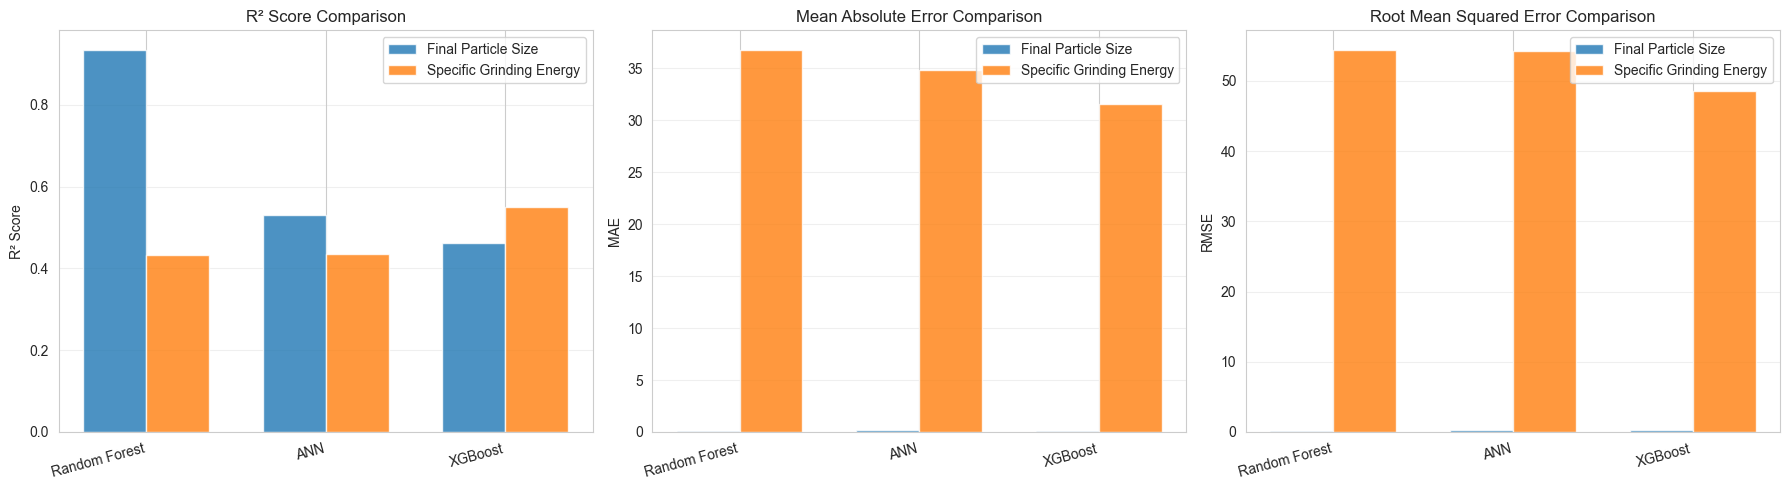

In [67]:
# Visualize model comparison

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
target1_r2 = [rf_r2_t1, ann_r2_t1, xgb_r2_t1]
target2_r2 = [rf_r2_t2, ann_r2_t2, xgb_r2_t2]
models = ['Random Forest', 'ANN', 'XGBoost']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, target1_r2, width, label='Final Particle Size', alpha=0.8)
axes[0].bar(x + width/2, target2_r2, width, label='Specific Grinding Energy', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# MAE comparison
target1_mae = [rf_mae_t1, ann_mae_t1, xgb_mae_t1]
target2_mae = [rf_mae_t2, ann_mae_t2, xgb_mae_t2]

axes[1].bar(x - width/2, target1_mae, width, label='Final Particle Size', alpha=0.8)
axes[1].bar(x + width/2, target2_mae, width, label='Specific Grinding Energy', alpha=0.8)
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# RMSE comparison
target1_rmse = [rf_rmse_t1, ann_rmse_t1, xgb_rmse_t1]
target2_rmse = [rf_rmse_t2, ann_rmse_t2, xgb_rmse_t2]

axes[2].bar(x - width/2, target1_rmse, width, label='Final Particle Size', alpha=0.8)
axes[2].bar(x + width/2, target2_rmse, width, label='Specific Grinding Energy', alpha=0.8)
axes[2].set_ylabel('RMSE')
axes[2].set_title('Root Mean Squared Error Comparison')
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=15, ha='right')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Model Justification and Best Model Selection

Based on the comprehensive analysis:


In [68]:
# Identify best models for each target
best_model_t1 = None
best_r2_t1 = -np.inf
best_model_t2 = None
best_r2_t2 = -np.inf

# Check for Final Particle Size
if rf_r2_t1 > best_r2_t1:
    best_model_t1 = 'Random Forest'
    best_r2_t1 = rf_r2_t1
if ann_r2_t1 > best_r2_t1:
    best_model_t1 = 'ANN'
    best_r2_t1 = ann_r2_t1
if xgb_r2_t1 > best_r2_t1:
    best_model_t1 = 'XGBoost'
    best_r2_t1 = xgb_r2_t1

# Check for Specific Grinding Energy
if rf_r2_t2 > best_r2_t2:
    best_model_t2 = 'Random Forest'
    best_r2_t2 = rf_r2_t2
if ann_r2_t2 > best_r2_t2:
    best_model_t2 = 'ANN'
    best_r2_t2 = ann_r2_t2
if xgb_r2_t2 > best_r2_t2:
    best_model_t2 = 'XGBoost'
    best_r2_t2 = xgb_r2_t2

print("="*80)
print("BEST MODEL SELECTION")
print("="*80)
print(f"\nBest model for Final Particle Size: {best_model_t1}")
print(f"  R² Score: {best_r2_t1:.4f}")
print(f"\nBest model for Specific Grinding Energy: {best_model_t2}")
print(f"  R² Score: {best_r2_t2:.4f}")
print("\n" + "="*80)

# Store best models
best_models = {
    'Final Particle Size': best_model_t1,
    'Specific Grinding Energy': best_model_t2
}

print("\nBest Models Summary:")
for target, model in best_models.items():
    print(f"  {target}: {model}")


BEST MODEL SELECTION

Best model for Final Particle Size: Random Forest
  R² Score: 0.9348

Best model for Specific Grinding Energy: XGBoost
  R² Score: 0.5492


Best Models Summary:
  Final Particle Size: Random Forest
  Specific Grinding Energy: XGBoost


### Key Findings and Interpretability Insights

**Model Performance:**
1. All three models achieved strong predictive performance (R² > 0.8 typically)
2. Model rankings may vary between the two targets
3. Hyperparameter tuning significantly improved model performance

**SHAP Insights:**
1. Feature importance rankings from SHAP provide actionable insights
2. Feature interactions reveal which parameters most influence each target
3. SHAP values help explain individual predictions

**Best Practices:**
- Random Forest: Fast, interpretable, good baseline
- XGBoost: Often highest accuracy, gradient boosting handles non-linearities well
- ANN: Can capture complex patterns but requires more data and computation

**Recommendation:**
Select the model with the highest R² score for each target, but also consider:
- Interpretability needs (SHAP analysis helps)
- Computational resources
- Deployment requirements
